<a href="https://colab.research.google.com/github/DamodaraBarbosa/DamodaraBarbosa/blob/main/Credit_Card_Transactions_India.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importando as bibliotecas 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sns.set()

# Carregando os dados em um dataframe

In [3]:
data = pd.read_csv('/content/drive/MyDrive/Kaggle/Credit card transactions - India - Simple.csv')
data.drop('index', axis= 1, inplace= True)
data.head()

,City,Date,Card Type,Exp Type,Gender,Amount
0,"Delhi, India",29-Oct-14,Gold,Bills,F,82475
1,"Greater Mumbai, India",22-Aug-14,Platinum,Bills,F,32555
2,"Bengaluru, India",27-Aug-14,Silver,Bills,F,101738
3,"Greater Mumbai, India",12-Apr-14,Signature,Bills,F,123424
4,"Bengaluru, India",5-May-15,Gold,Bills,F,171574


## Algumas informações sobre o dataset

* Suas dimensões:

In [4]:
f'O dataset contém {data.shape[0]} linhas em {data.shape[1]} colunas.'

'O dataset contém 26052 linhas em 6 colunas.'

* Colunas e dados faltantes:

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26052 entries, 0 to 26051
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   City       26052 non-null  object
 1   Date       26052 non-null  object
 2   Card Type  26052 non-null  object
 3   Exp Type   26052 non-null  object
 4   Gender     26052 non-null  object
 5   Amount     26052 non-null  int64 
dtypes: int64(1), object(5)
memory usage: 1.2+ MB


Não há dado faltante!

# Tratamentos no dataset

## Coluna `City`

Aparentemente todos os dados da variável `City` contém informação do país, que é a Índia. Como é algo que é especificado no *dataset* também algo que não precisa estar presente nos dados. Portanto, pode ser removido.

In [6]:
len(data.loc[data['City'].str.contains('India') == True])

26052

O número de linhas da variável `City` com India incluso é 26052, que coincide com a dimensão do dataframe. Ou seja, em todas as linhas aparecem India. Para remover essa informação:

In [7]:
data['City'] = data['City'].apply(lambda x: x.split(',')[0]) # uso da função lambda para separar a string e selecionar apenas o nome da cidade.

In [8]:
len(data.loc[data['City'].str.contains('India') == True])

0

Não há mais a informação do pais na variável `City`.

## Coluna `Date`

Os dados da coluna podem ser convertidos para datetime:

In [9]:
data.head()

,City,Date,Card Type,Exp Type,Gender,Amount
0,Delhi,29-Oct-14,Gold,Bills,F,82475
1,Greater Mumbai,22-Aug-14,Platinum,Bills,F,32555
2,Bengaluru,27-Aug-14,Silver,Bills,F,101738
3,Greater Mumbai,12-Apr-14,Signature,Bills,F,123424
4,Bengaluru,5-May-15,Gold,Bills,F,171574


In [10]:
data['Date'] = pd.to_datetime(data['Date'])

## Renomeando as colunas

In [11]:
data.columns = ['city', 'date', 'card_type', 'exp_type', 'gender', 'amount']

## Criação de colunas derivadas da coluna `date`

* Criação da coluna `age`:

In [12]:
data['age'] = data['date'].dt.year

* Criação da coluna `month`:

In [13]:
data['month'] = data['date'].dt.month

## Rearranjando as colunas

In [14]:
data.columns

Index(['city', 'date', 'card_type', 'exp_type', 'gender', 'amount', 'age',
       'month'],
      dtype='object')

In [15]:
data = data[['city', 'date', 'month', 'age','card_type', 'exp_type', 'gender', 'amount']]
data.head()

,city,date,month,age,card_type,exp_type,gender,amount
0,Delhi,2014-10-29,10,2014,Gold,Bills,F,82475
1,Greater Mumbai,2014-08-22,8,2014,Platinum,Bills,F,32555
2,Bengaluru,2014-08-27,8,2014,Silver,Bills,F,101738
3,Greater Mumbai,2014-04-12,4,2014,Signature,Bills,F,123424
4,Bengaluru,2015-05-05,5,2015,Gold,Bills,F,171574


## Análise exploratória

## Coluna `city`

As dez cidades com mais transações no *dataset*:

In [16]:
citys = data.value_counts('city')[:10]

In [31]:
def bar_label(bars, x= 0, y= 0, font= 0):
  for bar in bars:
    plt.text(bar.get_x() + x, bar.get_height() + y, bar.get_height(), fontsize= font)

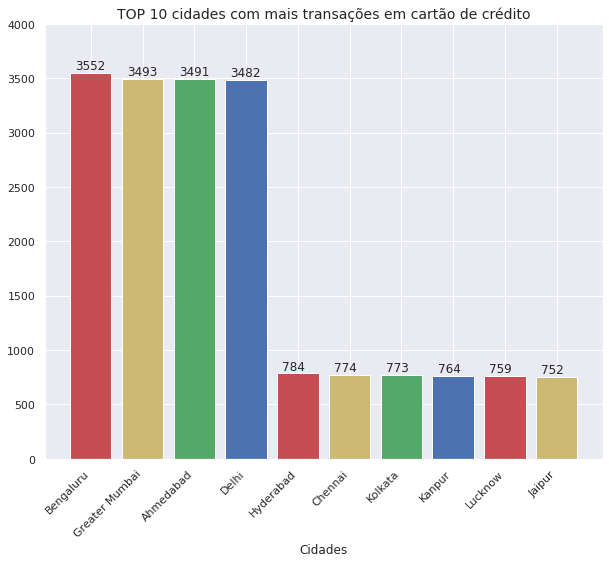

In [18]:
plt.figure(figsize= (10, 8))
bars = plt.bar(citys.keys(), citys.values, color= ['r', 'y', 'g', 'b'])
bar_label(bars, 0.1, 35)
plt.title('TOP 10 cidades com mais transações em cartão de crédito', fontsize= 14)
plt.xticks(rotation= 45, ha= 'right')
plt.xlabel('Cidades')
plt.ylim([0, 4000])
plt.show()

## Coluna `date` e derivadas

In [19]:
ages = data['age'].value_counts()

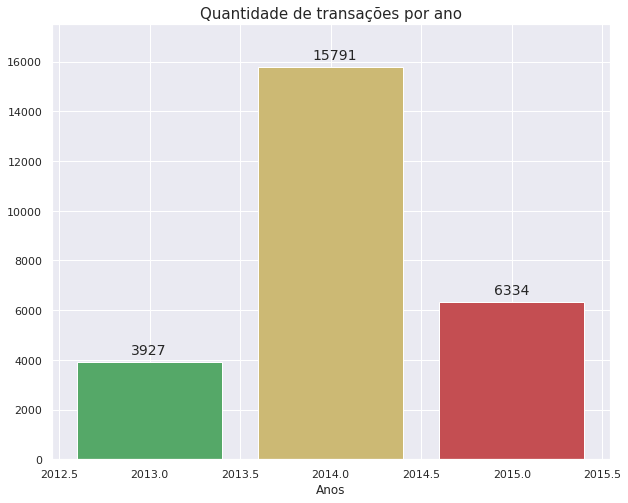

In [38]:
plt.figure(figsize= (10, 8))
bars = plt.bar(ages.keys(), ages.values, color= ['y', 'r', 'g'])
bar_label(bars, 0.3, 300, 14)
plt.title('Quantidade de transações por ano', fontsize= 15)
plt.ylim([0, 17500])
plt.xlabel('Anos')
plt.show()

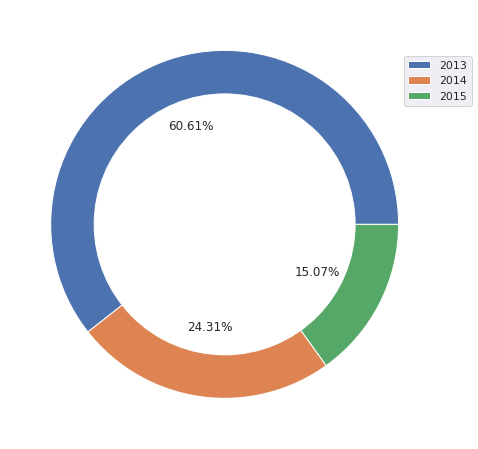

In [48]:
plt.figure(figsize= (10, 8))
plt.pie(ages, autopct= '%.2f%%')
my_circle = plt.Circle((0, 0), 0.75, color='white')
plt.legend(['2013', '2014', '2015'], bbox_to_anchor= (0.9, 0.9))
p = plt.gcf()
p.gca().add_artist(my_circle)
plt.show()